In [1]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

**Exercise 1.1**

In [2]:
def scores_and_labels(english, tagalog):
    with open(english, 'r') as eng, open(tagalog, 'r') as tag:       
        eng_scores = eng.read().splitlines()         
        tag_scores = tag.read().splitlines()

    eng_scores = [float(x) for x in eng_scores] 
    eng_labels = [0] * len(eng_scores) # class 0 (self)    
    tag_scores = [float(x) for x in tag_scores] 
    tag_labels = [1] * len(tag_scores) # class 1 (foreign)

    anomaly_scores = eng_scores + tag_scores
    anomaly_labels = eng_labels + tag_labels
    return anomaly_scores, anomaly_labels

In [9]:
def plot_ROC(fpr, tpr, filename=None):
    auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], '--')
    plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend()
    if filename:
        plt.savefig(f'figures/{filename}')
    plt.show()

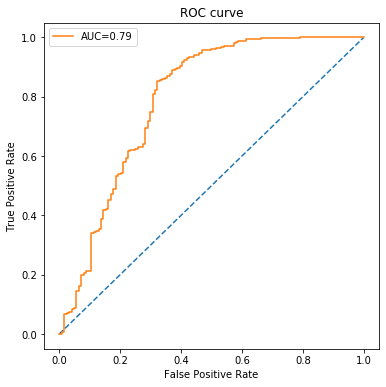

In [10]:
# english.test
english = "lang-matches/english-matches.txt"
# tagalog.test
tagalog = "lang-matches/tagalog-matches.txt"

anomaly_scores, anomaly_labels = scores_and_labels(english, tagalog)
fpr, tpr, thresholds = metrics.roc_curve(anomaly_labels, anomaly_scores, pos_label=1)
plot_ROC(fpr, tpr, "ex1_1.png")